# Seoul Bike 🚴‍♂️ Sharing Demand Prediction

## Project Information
> We will be predicting rental bike count changes with respect to various changes in environmental factors such as temperature, rainfall, holiday etc. 
> Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. 
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information. 

## Data Information

The dataset has been downloaded from <a href='https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand'>link</a> 
This is an archived dataset from UC Irvine
#### Data Attributes
Additional Information

* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius 
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### 1. Basic Analysis

In [43]:
# importing the basic tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy

# importing the preprocessors from sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# importing the regression models to test
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.linear_model import Ridge, ElasticNet, Lasso 

# importing the metrics evaluator
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv('SeoulBikeData.csv', low_memory= False, delimiter=',',
                parse_dates= ['Date'],
                encoding='unicode-escape')

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


#### Reformatting the Data with new Column Names

In [7]:
# creating a mapping of new column names
column_dict = dict(zip(list(df.columns), ['date', 'target', 'hour', 'temperature', 'humidity', 'wind-speed', 'visibility', 'dew-point-temp', 'solar-radiation', 'rainfall', 'snowfall', 'seasons', 'holiday', 'functioning-day']))

In [8]:
# creating a copy of the dataframe
df_tmp = df.copy()
df_tmp = df_tmp.rename(column_dict, axis = 1, index = None)
df_tmp = df_tmp.drop('date', axis = 1)
df_tmp.head().T

,0,1,2,3,4
target,254,204,173,107,78
hour,0,1,2,3,4
temperature,-5.2,-5.5,-6.0,-6.2,-6.0
humidity,37,38,39,40,36
wind-speed,2.2,0.8,1.0,0.9,2.3
visibility,2000,2000,2000,2000,2000
dew-point-temp,-17.6,-17.6,-17.7,-17.6,-18.6
solar-radiation,0.0,0.0,0.0,0.0,0.0
rainfall,0.0,0.0,0.0,0.0,0.0
snowfall,0.0,0.0,0.0,0.0,0.0


In [9]:
len(df_tmp)

8760

In [10]:
df_tmp.isna().sum()

target             0
hour               0
temperature        0
humidity           0
wind-speed         0
visibility         0
dew-point-temp     0
solar-radiation    0
rainfall           0
snowfall           0
seasons            0
holiday            0
functioning-day    0
dtype: int64

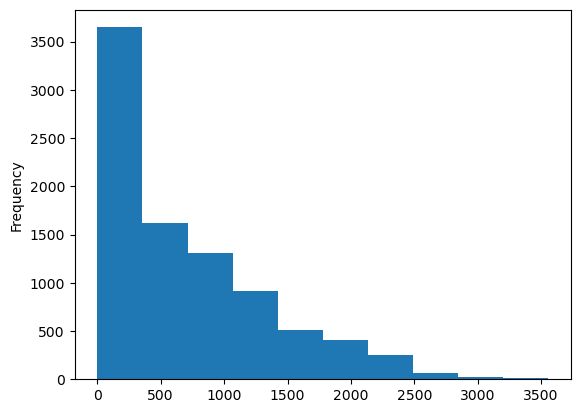

In [11]:
df_tmp.target.plot(kind='hist');

Visualization of the non-numerical features

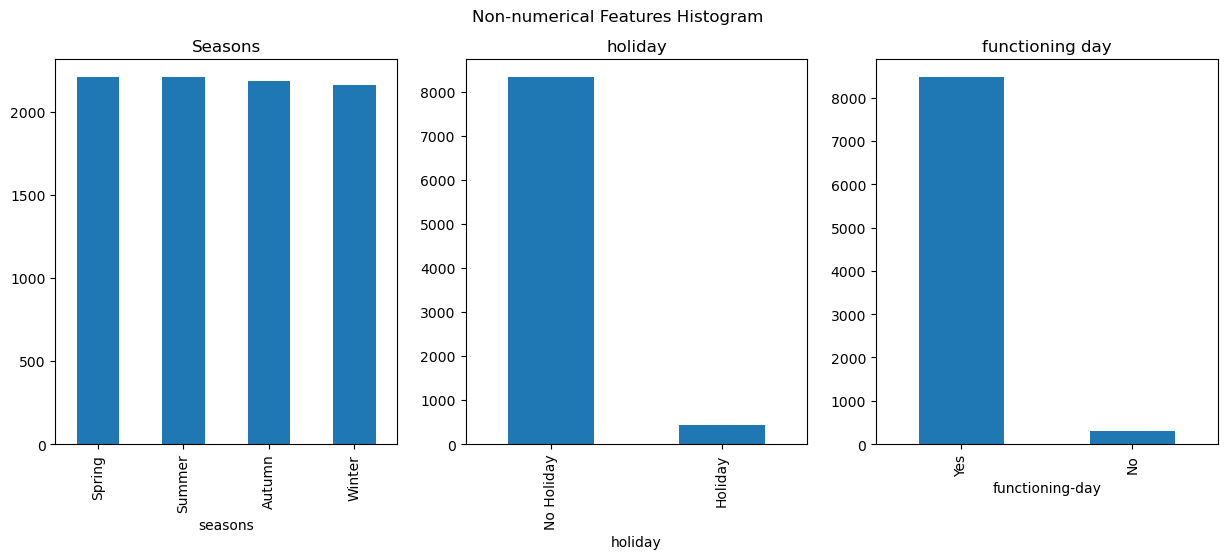

In [12]:
fig = plt.figure(figsize=(15,5))
# plot 1 Seasons
plt.subplot(1, 3, 1)
df_tmp['seasons']. \
    value_counts(). \
    sort_values(ascending = False). \
    plot(kind = 'bar')
plt.title('Seasons')

# plot 2 Holidays
plt.subplot(1, 3, 2)
df_tmp['holiday']. \
    value_counts().\
    sort_values(ascending = False). \
    plot(kind = 'bar')
plt.title('holiday')

# plot 3 Functional Days
plt.subplot(1, 3, 3)
df_tmp['functioning-day'].\
    value_counts(). \
    sort_values(ascending = False).\
    plot(kind='bar')
plt.title('functioning day')

fig.suptitle('Non-numerical Features Histogram');

In [13]:
pd.__version__

'2.0.3'

In [14]:
# Correlation matrix of just the numerical features
corr_mat = df_tmp.corr(numeric_only=True)
corr_mat.style.background_gradient(cmap = 'Reds')

,target,hour,temperature,humidity,wind-speed,visibility,dew-point-temp,solar-radiation,rainfall,snowfall
target,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
temperature,0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
humidity,-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
wind-speed,0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
visibility,0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
dew-point-temp,0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
solar-radiation,0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
rainfall,-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
snowfall,-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


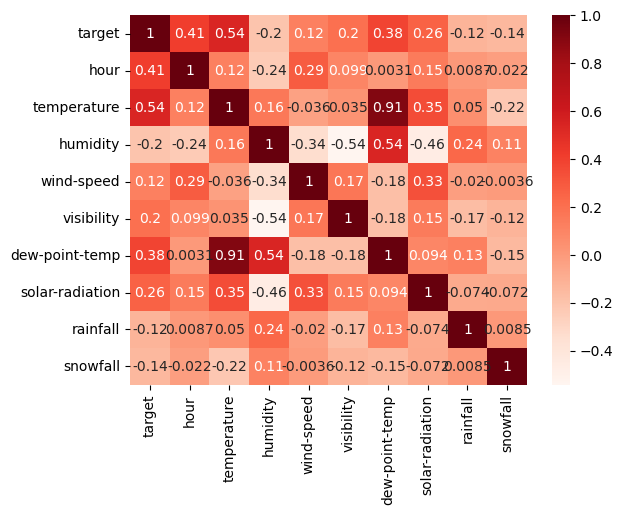

In [15]:
# heatmap of the correlation matrix
sns.heatmap(corr_mat, annot = True, cmap = 'Reds');

In [16]:
# pairplot of the numerical data:
sns.pairplot(df_tmp);

Because we have 8760 variables, I might create a validation dataset to optimize our hyperparameters on

#### Creating our datasets
1. Training data
2. Validation Data 
3. Testing data

In [ ]:
# creating our X and y data
X = df_tmp.drop('target', axis =1)
y = df_tmp.target

# creating our train/val/test split
X_train, X_split, y_train, y_split = train_test_split(X, y, test_size = 0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_split, y_split, test_size = 0.5, random_state=42)

In [ ]:
# checking the shape of our datasets
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((6132, 12), (6132,), (1314, 12), (1314,), (1314, 12), (1314,))

#### Preprocessing Training Dataset

In [19]:
for column, content in X_train.items():
    print(f'{column} : {content[:10]}')

hour : 1444     4
1652    20
7496     8
1893    21
3880    16
2406     6
5082    18
8553     9
4663     7
1966    22
Name: hour, dtype: int64
temperature : 1444   -11.1
1652    -5.8
7496    11.4
1893    -2.3
3880    19.1
2406     3.4
5082    27.5
8553     0.2
4663    19.4
1966     0.5
Name: temperature, dtype: float64
humidity : 1444    50
1652    44
7496    66
1893    38
3880    54
2406    85
5082    79
8553    28
4663    69
1966    22
Name: humidity, dtype: int64
wind-speed : 1444    1.2
1652    2.1
7496    0.8
1893    2.3
3880    3.2
2406    1.5
5082    0.5
8553    1.9
4663    0.3
1966    2.9
Name: wind-speed, dtype: float64
visibility : 1444    1986
1652    1994
7496    1991
1893    2000
3880     542
2406     234
5082    1237
8553    1932
4663    1277
1966    2000
Name: visibility, dtype: int64
dew-point-temp : 1444   -19.4
1652   -16.1
7496     5.2
1893   -14.7
3880     9.5
2406     1.1
5082    23.5
8553   -16.2
4663    13.5
1966   -18.8
Name: dew-point-temp, dtype: float64
solar-

In [20]:
X_train.holiday.value_counts()

holiday
No Holiday    5828
Holiday        304
Name: count, dtype: int64

In [21]:
X_train.seasons.value_counts()

seasons
Spring    1565
Summer    1543
Autumn    1539
Winter    1485
Name: count, dtype: int64

In [22]:
X_train['functioning-day'].value_counts()

functioning-day
Yes    5922
No      210
Name: count, dtype: int64

### Creating a preprocessor function

In [23]:
# model dictionary to test:
model_dict = {'LinearSVC': LinearSVC(),
             'RandomForestReg': RandomForestRegressor(),
             'LinearRegression': LinearRegression(),
             'Ridge': Ridge(),
             'Lasso': Lasso(),
             'Elastic': ElasticNet() }
import time
def model_processing(model_dict, 
                     categorical_list,
                     num_features,
                     X_train, 
                     y_train,
                     X_test,
                     y_test):
    '''
    using the model dictionary to output scores
    '''
    # creating a column transformer for categorical variables
    column_transformer = ColumnTransformer(transformers=[
        ('onhe', OneHotEncoder(), categorical_list),
        ('norm', MinMaxScaler(), num_features)
     ])
     # creating an empty scoring dict
    score_dict = {}
    
    # looping through the model dictionary to test
    for model_name, model in model_dict.items():
        # setting up the model instantiation pipeline
        model_pipeline = Pipeline(steps=[
            ('column_transform', column_transformer),
            ('model', model)
        ])
           
        start = time.time()
        print(f'testing {model_name}...')
        
        model_pipeline.fit(X_train, y_train)
        end = time.time()
        
        # scoring the model and placing that into a dictionary
        print(f'It took training model {model_name}, time of {end - start}s')
        score_dict[model_name] = model_pipeline.score(X_test, y_test)
    return score_dict

In [24]:
# categorical_features
categorical_features = ['seasons', 'holiday', 'functioning-day']

# creating a num-column list:
num_features = []
for label, contents in X_train.items():
    if pd.api.types.is_numeric_dtype(contents):
        num_features.append(label)
   

score_dict = model_processing(model_dict= model_dict,
                  categorical_list=categorical_features,
                    num_features=num_features,
                  X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test)


testing LinearSVC...


/Users/johnnysin/opt/anaconda3/envs/env/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


It took training model LinearSVC, time of 33.050837993621826s
testing RandomForestReg...
It took training model RandomForestReg, time of 3.133542776107788s
testing LinearRegression...
It took training model LinearRegression, time of 0.025352954864501953s
testing Ridge...
It took training model Ridge, time of 0.012841939926147461s
testing Lasso...
It took training model Lasso, time of 0.014522314071655273s
testing Elastic...
It took training model Elastic, time of 0.010583877563476562s


In [25]:
score_dict.keys(), score_dict.values()

(dict_keys(['LinearSVC', 'RandomForestReg', 'LinearRegression', 'Ridge', 'Lasso', 'Elastic']),
 dict_values([0.03120243531202435, 0.863342555706335, 0.5391786244960647, 0.5404422037415411, 0.5407034918485472, 0.2305638737284561]))

In [26]:
score_df = pd.DataFrame(score_dict.values(), score_dict.keys(),
                        columns=['Coefficient of Determination'])
score_df.style.background_gradient(cmap = 'Reds')

,Coefficient of Determination
LinearSVC,0.031202
RandomForestReg,0.863343
LinearRegression,0.539179
Ridge,0.540442
Lasso,0.540703
Elastic,0.230564


### Initially we see the highest score is the RandomForest

We will optimize the hyperparameters for this models, **however** because the other three models LinearRegression, Lasso, and Ridge have an "okay" score, we will optimize these later.

### Optimizing the RandomForestRegressor Model
1. Create a pipeline for encoding catergorical features

In [27]:
np.random.seed(42)
# creating a column transformer for onehotencoding
preprocessor = ColumnTransformer(transformers=[
    ('onhe', OneHotEncoder(), categorical_features),
    ('norm', MinMaxScaler(), num_features)
])

# creating a gridsearchCV pipeline

rf_pipe = Pipeline(steps=[
    ('pre', preprocessor),
    ('model', RandomForestRegressor())
])

# fitting the lasso_pipe model
rf_pipe.fit(X_train, y_train)

# scoring the model
rf_pipe.score(X_test, y_test)

0.8609913125991778

Checking the parameters of the randomForest regressor

In [28]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('pre',
   ColumnTransformer(transformers=[('onhe', OneHotEncoder(),
                                    ['seasons', 'holiday', 'functioning-day']),
                                   ('norm', MinMaxScaler(),
                                    ['hour', 'temperature', 'humidity',
                                     'wind-speed', 'visibility', 'dew-point-temp',
                                     'solar-radiation', 'rainfall', 'snowfall'])])),
  ('model', RandomForestRegressor())],
 'verbose': False,
 'pre': ColumnTransformer(transformers=[('onhe', OneHotEncoder(),
                                  ['seasons', 'holiday', 'functioning-day']),
                                 ('norm', MinMaxScaler(),
                                  ['hour', 'temperature', 'humidity',
                                   'wind-speed', 'visibility', 'dew-point-temp',
                                   'solar-radiation', 'rainfall', 'snowfall'])]),
 'model': RandomForestRegresso

In [29]:
np.random.seed(42)

# checking the cross_validation score
cross_val_score(rf_pipe, X, y, cv = 5, verbose = True, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.6s remaining:   15.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.7s finished


array([0.31076273, 0.5421513 , 0.74404733, 0.60094319, 0.63510926])

In [30]:
# Creating a dict of hyperparamters for GridSearchCV
gs_grid = {'model__n_estimators': np.arange(10,100, 10),
          'model__max_features':['auto', 'sqrt'] ,
          'model__min_samples_split': [2,5,10]  ,
          'model__min_samples_leaf': [1,2,4]  ,
          }

# instantiating the gridsearchCV
gs_model = GridSearchCV(rf_pipe, 
                        param_grid=gs_grid,
                       verbose = True,
                       n_jobs = -1,
                       cv = 5)

In [31]:
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/Users/johnnysin/opt/anaconda3/envs/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
336 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/johnnysin/opt/anaconda3/envs/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/johnnysin/opt/anaconda3/envs/env/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/johnnysin/opt/anaconda3

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('onhe',
                                                                         OneHotEncoder(),
                                                                         ['seasons',
                                                                          'holiday',
                                                                          'functioning-day']),
                                                                        ('norm',
                                                                         MinMaxScaler(),
                                                                         ['hour',
                                                                          'temperature',
                                                                          'humidity',
                                                                          'wind-speed',
                                                                          'visibility',
                                                                          'dew-point-temp',
                                                                          'solar-radiation',
                                                                          'rainfall',
                                                                          'snowfall'])])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__max_features': ['auto', 'sqrt'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             verbose=True)

In [32]:
gs_model.best_params_

{'model__max_features': 'sqrt',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 80}

In [33]:
# checking out how much better the gridsearch model did compared to the original fitted model
print(f'The GridsearchCV gave us an output score of: {gs_model.score(X_test, y_test)} \n untuned RandomForestRegressor gives us a score of: {rf_pipe.score(X_test, y_test)}')

The GridsearchCV gave us an output score of: 0.8573417106494139 
 untuned RandomForestRegressor gives us a score of: 0.8609913125991778


In [34]:
# checking out the other metrics
def metrics_evaluator(model, X_data, y_data):
    '''
    inputting the model and the X_test data to output a dictionary of metrics related to regression
    '''
    y_data_preds = model.predict(X_data)
    metrics_dict = {'R2 Score': r2_score(y_data, y_data_preds),
                   'Mean Absolute Error': mean_absolute_error(y_data, y_data_preds),
                   'Mean Squared Error': mean_squared_error(y_data, y_data_preds)}
    
    return metrics_dict

In [35]:
gs_model_metrics, rf_model_metrics = metrics_evaluator(gs_model, X_test, y_test), metrics_evaluator(rf_pipe, X_test, y_test)

In [36]:
pd.DataFrame(gs_model_metrics.values(), gs_model_metrics.keys(), columns = ['Scores'])

,Scores
R2 Score,0.857342
Mean Absolute Error,150.527683
Mean Squared Error,57715.294725


In [37]:
pd.DataFrame(rf_model_metrics.values(), rf_model_metrics.keys(), columns = ['Scores'])

,Scores
R2 Score,0.860991
Mean Absolute Error,143.519703
Mean Squared Error,56238.774481


### Testing for Feature variability 

In [41]:
# getting the F statistic and P value for each variable

y_stat = df_tmp['target']
x_stat_1 = X[num_features]

In [46]:
x_stat = sm.add_constant(x_stat_1)
results = sm.OLS(y_stat, x_stat).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     864.1
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:09:20   Log-Likelihood:                -66315.
No. Observations:                8760   AIC:                         1.326e+05
Df Residuals:                    8750   BIC:                         1.327e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             548.8536    100.050      5.486      0.000     352.731     744.976
hour               27.3155      0.789     34.642      0.000      25.770      28.861
temperature        26.5793      3.920      6.780      0.000      18.895      34.264
humidity           -8.8115      1.112     -7.925      0.000     -10.991      -6.632
wind-speed          6.9221      5.469      1.266      0.206      -3.799      17.643
visibility          0.0213      0.010      2.062      0.039       0.001       0.042
dew-point-temp      5.4131      4.132      1.310      0.190      -2.686      13.513
solar-radiation   -79.3428      8.210     -9.664      0.000     -95.437     -63.248
rainfall          -58.8069      4.631    -12.699      0.000     -67.885     -49.729
snowfall           21.0770     12.023      1.753      0.080      -2.491      44.645
==============================================================================
Omnibus:                      947.548   Durbin-Watson:                   0.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1824.527
Skew:                           0.710   Prob(JB):                         0.00
Kurtosis:                       4.727   Cond. No.                     3.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using the OLS regression method as a preliminary way to figure out feature importance, we see that `visibility` and `wind-speed` seem to not be significant when fitting the model